In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [17]:
dataset=pd.read_csv('insurance.csv')
dataset.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [18]:
dataset.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [19]:
dataset.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [20]:
from sklearn.preprocessing import LabelEncoder
tset = dataset.apply(LabelEncoder().fit_transform)
tset.head()

,age,sex,bmi,children,smoker,region,charges
0,1,0,197,0,1,3,1005
1,0,1,350,1,0,2,57
2,10,1,331,3,0,2,306
3,15,1,73,0,0,1,1097
4,14,1,223,0,0,1,254


In [21]:
tset.corr() 

,age,sex,bmi,children,smoker,region,charges
age,1.000000,-0.020856,0.112052,0.042469,-0.025019,0.002127,0.534522
sex,-0.020856,1.000000,0.044714,0.017163,0.076185,0.004588,0.009533
bmi,0.112052,0.044714,1.000000,0.011228,0.002085,0.155176,0.119902
children,0.042469,0.017163,0.011228,1.000000,0.007673,0.016569,0.126132
smoker,-0.025019,0.076185,0.002085,0.007673,1.000000,-0.002181,0.663509
region,0.002127,0.004588,0.155176,0.016569,-0.002181,1.000000,-0.043780
charges,0.534522,0.009533,0.119902,0.126132,0.663509,-0.043780,1.000000


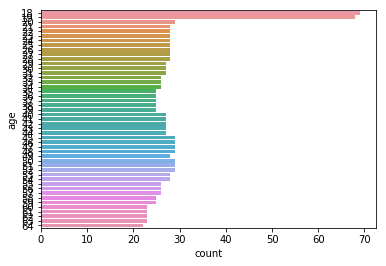

In [22]:
sns.countplot(y='age',data=dataset)

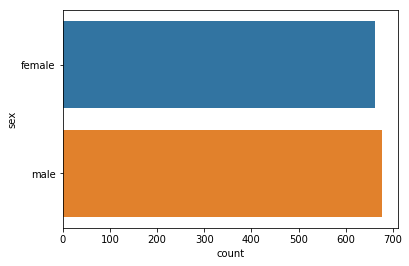

In [23]:
sns.countplot(y='sex',data=dataset)

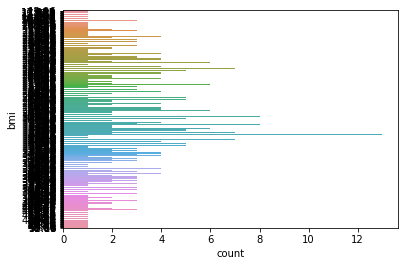

In [24]:
sns.countplot(y='bmi',data=dataset)

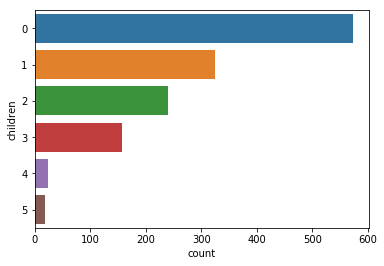

In [25]:
sns.countplot(y='children',data=dataset)

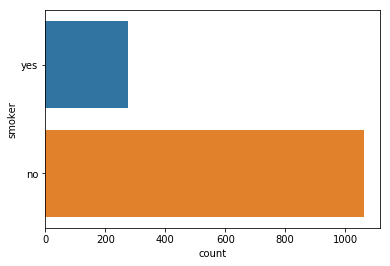

In [26]:
sns.countplot(y='smoker',data=dataset)

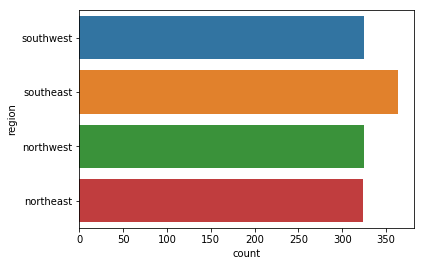

In [27]:
sns.countplot(y='region',data=dataset)

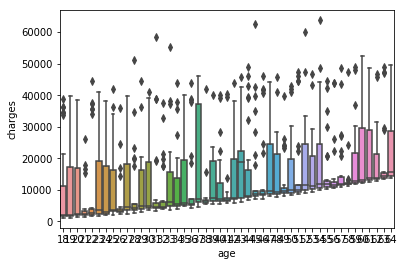

In [28]:
ax = sns.boxplot(x="age", y="charges", data=dataset)

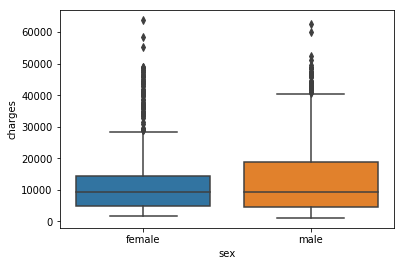

In [29]:
ax = sns.boxplot(x="sex", y="charges", data=dataset)

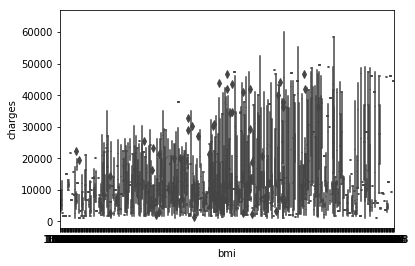

In [30]:
ax = sns.boxplot(x="bmi", y="charges", data=dataset)

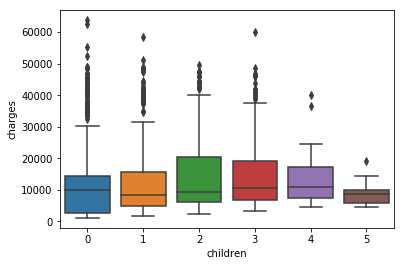

In [31]:
ax = sns.boxplot(x="children", y="charges", data=dataset)

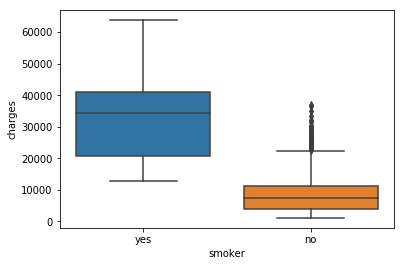

In [32]:
ax = sns.boxplot(x="smoker", y="charges", data=dataset)

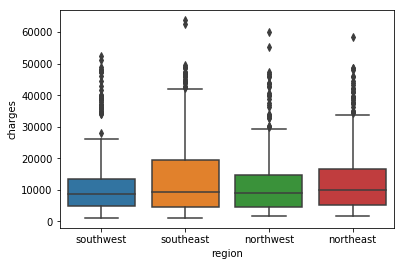

In [33]:
ax = sns.boxplot(x="region", y="charges", data=dataset)

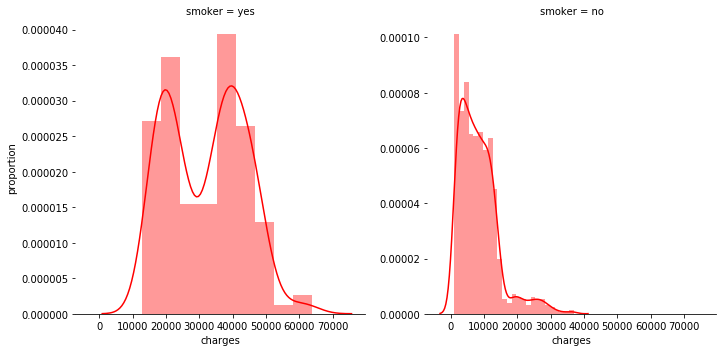

In [34]:
g = sns.FacetGrid(dataset, col="smoker", height= 5, sharey=False, sharex = True)
g.map(sns.distplot, "charges", color = 'r');
g.set_axis_labels("charges", "proportion");
g.despine(left=True)

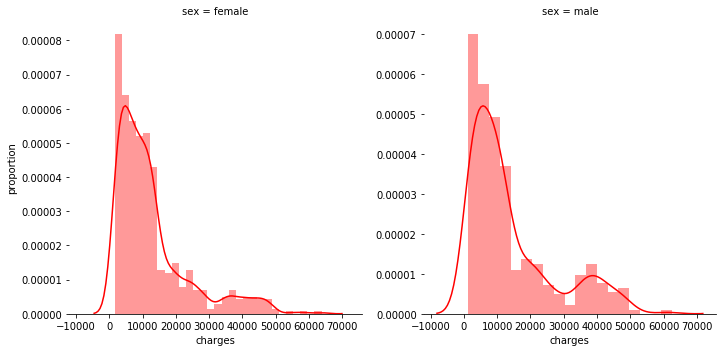

In [35]:
g = sns.FacetGrid(dataset, col="sex", height= 5, sharey=False, sharex = True)
g.map(sns.distplot, "charges", color = 'r');
g.set_axis_labels("charges", "proportion");
g.despine(left=True)

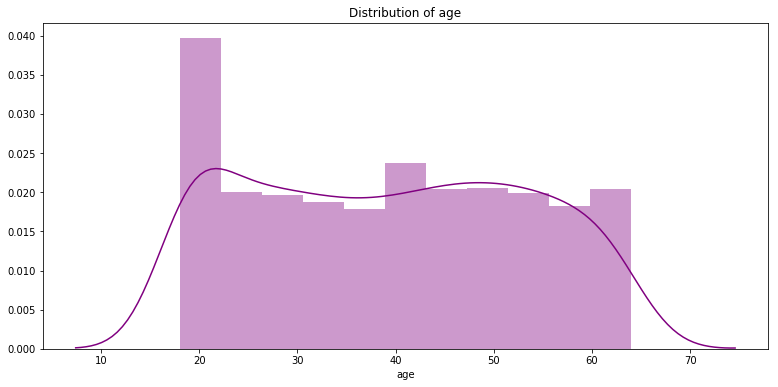

In [36]:
plt.figure(figsize=(13,6))
plt.title("Distribution of age")
ax = sns.distplot(dataset["age"], color = 'purple')

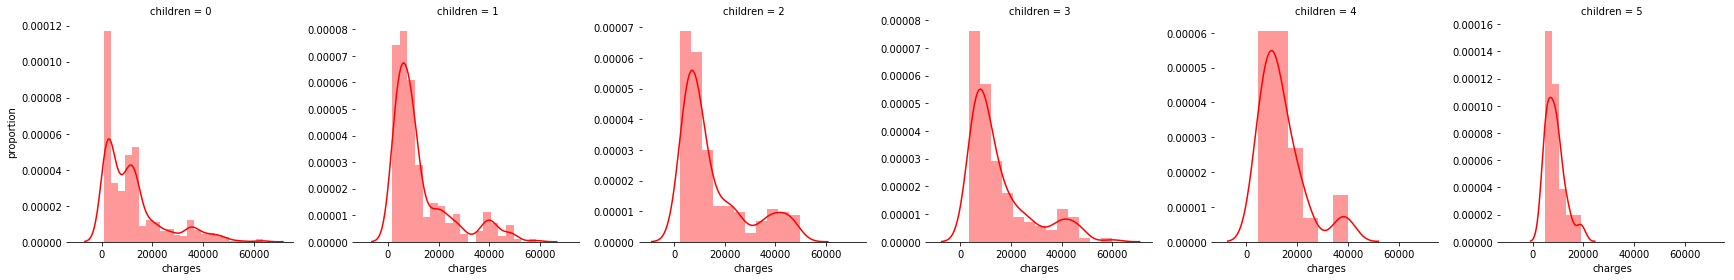

In [37]:
g = sns.FacetGrid(dataset, col="children", height= 4, sharey=False, sharex = True)
g.map(sns.distplot, "charges", color = 'r');
g.set_axis_labels("charges", "proportion");
g.despine(left=True)

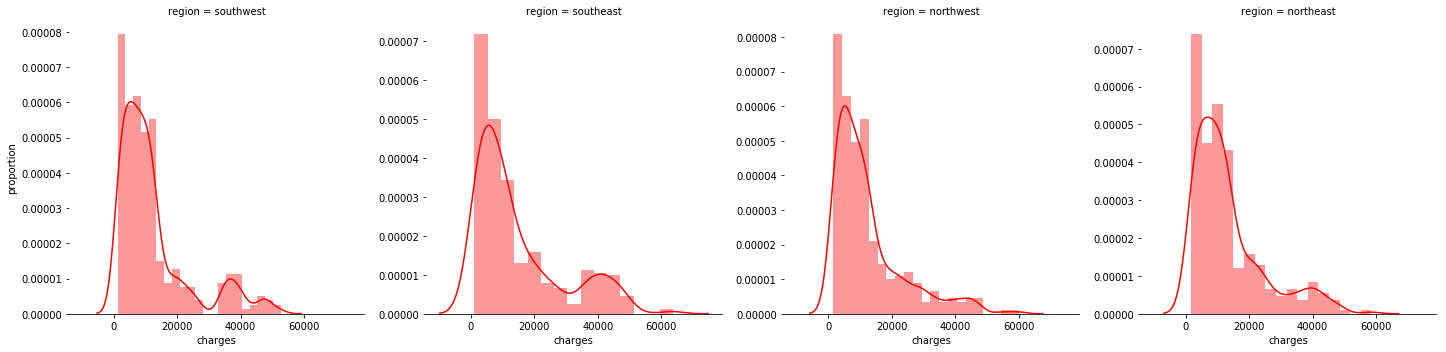

In [38]:
g = sns.FacetGrid(dataset, col="region", height= 5, sharey=False, sharex = True)
g.map(sns.distplot, "charges", color = 'r');
g.set_axis_labels("charges", "proportion");
g.despine(left=True)

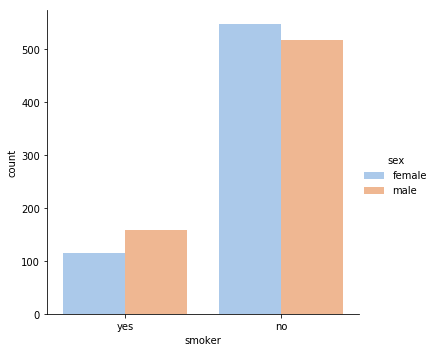

In [39]:
sns.catplot(x="smoker", kind="count", hue = 'sex', data = dataset , palette='pastel');
plt.show()

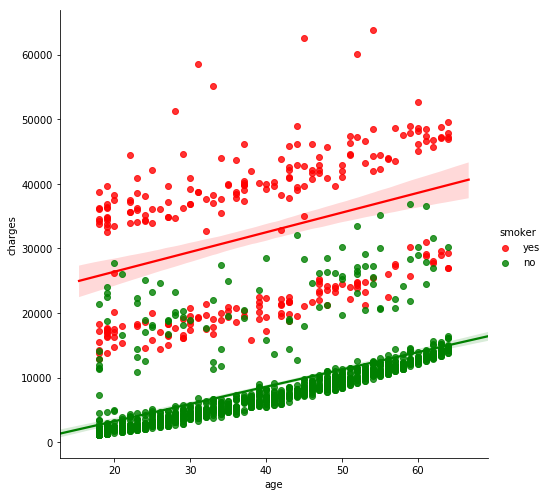

In [40]:
sns.lmplot(x="age", y="charges", hue="smoker", data=dataset, palette=dict(yes="r", no="g"), height = 7);
ax.set_title('Smokers and non-smokers');
plt.show()

In [41]:
dataset['age'] = dataset['age'].astype(float)
dataset['children'] = dataset['children'].astype(float)
dataset = pd.get_dummies(dataset)
dataset.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19.0,27.900,0.0,16884.92400,1,0,0,1,0,0,0,1
1,18.0,33.770,1.0,1725.55230,0,1,1,0,0,0,1,0
2,28.0,33.000,3.0,4449.46200,0,1,1,0,0,0,1,0
3,33.0,22.705,0.0,21984.47061,0,1,1,0,0,1,0,0
4,32.0,28.880,0.0,3866.85520,0,1,1,0,0,1,0,0


In [42]:
y = dataset['charges']
X = dataset.drop(columns=['charges'])

In [43]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1,random_state=42)

In [57]:
from sklearn.ensemble import RandomForestRegressor
rf= RandomForestRegressor(n_estimators = 50).fit(X_train, y_train)
rtrain_pred = rf.predict(X_train)
rtest_pred = rf.predict(X_test)


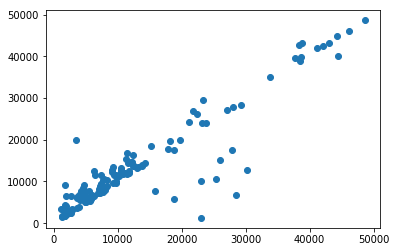

In [58]:
plt.scatter(y_test,rtest_pred)

In [59]:
from sklearn.metrics import r2_score, mean_squared_error
rtrain_mse = mean_squared_error(y_train,rtrain_pred)
rtest_mse = mean_squared_error(y_test,rtest_pred)
print('MSE train data: {:.5}, MSE test data: {:.5}'.format(rtrain_mse, rtest_mse))
print('RMSE train data: {:.5}, RMSE test data: {:.5}'.format(np.sqrt(np.absolute(rtrain_mse)),np.sqrt(np.absolute(rtrain_mse))))
print('R2 train data: {:.5}, R2 test data: {:.5}'.format(r2_score(y_train, rtrain_pred),r2_score(y_test, rtest_pred)))

MSE train data: 3.7194e+06, MSE test data: 2.2439e+07
RMSE train data: 1928.6, RMSE test data: 1928.6
R2 train data: 0.97478, R2 test data: 0.83734
